# Homework 3
### Name: Palash Raval
### Collaborators: None

Due date: May 26, 2025

Submission instructions: 
- __Autograder will not be used for scoring, but you still need to submit the python file converted from this notebook (.py) and the notebook file (.ipynb) to the code submission window.__ 
To convert a Jupyter Notebook (`.ipynb`) to a regular Python script (`.py`):
  - In Jupyter Notebook: File > Download as > Python (.py)
  - In JupyterLab: File > Save and Export Notebook As... > Executable Script
  - In VS Code Jupyter Notebook App: In the toolbar, there is an Export menu. Click on it, and select Python script.
- Submit `hw3.ipynb` and `hw3.py` on Gradescope under the window "Homework 3 - code". Do **NOT** change the file name.
- Convert this notebook into a pdf file and submit it on Gradescope under the window "Homework 3 - PDF". Make sure all your code and text outputs in the problems are visible. 


This homework requires a new package, `pyarrow`, which runs behind `duckdb`. Please make sure to install them in your `BIOSTAT203C-24S` environment:

```bash
conda activate BIOSTAT203C-25S
conda install -c conda-forge pyarrow
pip install polars
```


## Problem 1. 

Recall the simple random walk.  At each step, we flip a fair coin. If heads, we move "forward" one unit; if tails, we move "backward." 

### (A).

Way back in Homework 1, you wrote some code to simulate a random walk in Python. 

Start with this code. If you have since written random walk code that you prefer, you can use this instead. Regardless, take your code, modify it, and enclose it in a function `rw()`. This function should accept a single argument `n`, the length of the walk. The output should be a list giving the position of the random walker, starting with the position after the first step. For example, 

```python
rw(5)
[1, 2, 3, 2, 3]
```

Unlike in the HW1 problem, you should not use upper or lower bounds. The walk should always run for as long as the user-specified number of steps `n`. 

Use your function to print out the positions of a random walk of length `n = 10`. 

Don't forget a helpful docstring! 




In [14]:
import random

In [45]:
'''
This function does a simple random walk. 
It takes in one input: n(an integer denoting the number of steps to take).
The output for this function is a list that shows the overall position at each step with the
list's length being the value of n.
'''

def rw(n):
    step_list = []
    starting_spot = 0
    for step in range(n):
        direction = random.choice([-1, 1])
        starting_spot = starting_spot + direction
        step_list.append(starting_spot)
    
    return(step_list)


In [48]:
# Testing rw() function with n value of 10

rw(10)

[-1, -2, -1, -2, -3, -2, -1, -2, -3, -4]

### (B). 

Now create a function called `rw2(n)`, where the argument `n` means the same thing that it did in Part A. Do so using `numpy` tools. Demonstrate your function as above, by creating a random walk of length 10. You can (and should) return your walk as a `numpy` array. 

**Requirements**: 

- No for-loops. 
- This function is simple enough to be implemented as a one-liner of fewer than 80 characters, using lambda notation. Even if you choose not to use lambda notation, the body of your function definition should be no more than three lines long. Importing `numpy` does not count as a line. 
- A docstring is required if and only if you take more than one line to define the function. 

**Hints**:

- Check the documentation for `np.random.choice()`. 
- `np.cumsum()`. 


In [40]:
# creating function to get numpy array for simple walk 

import numpy as np

def rw2(n):
    return np.cumsum(np.random.choice([-1,1], n))

In [41]:
# testing rw2() function using n = 10 

rw2(10)

array([-1,  0,  1,  2,  3,  4,  3,  2,  1,  0])

### (C).

Use the `%timeit` magic macro to compare the runtime of `rw()` and `rw2()`. Test how each function does in computing a random walk of length `n = 10000`. 

In [49]:
%timeit rw(10000)

1.95 ms ± 7.32 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [44]:
%timeit rw2(10000)

72.6 µs ± 14 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### (D). 

Write a few sentences in which you comment on (a) the performance of each function and (b) the ease of writing and reading each function. 

In [50]:
# In terms of performance, rw2() was much faster than rw(). It took 1.95 ms for rw() to run
#whereas, it only took rw2() 72.6 µs to run. For this problem, the speed doesn't seem to matter a whole lot 
#because this problem is not computationally extensive. However, it think this shows that it would be advantageous
#to use numpy arrays whenever you are working with more extensive problems.


#In terms of ease of writing and reading the two functions, I would say that the rw2() function is much 
#easier to read and write. It took only a couple lines to define the entire function, which is why I said
#it would be easier to read and write. The rw() function is longer, so it would take longer to read and to write.

### (E). 


In this problem, we will perform a `d`-dimensional random walk. There are many ways to define such a walk. Here's the definition we'll use for this problem: 

> At each timestep, the walker takes one random step forward or backward **in each of `d` directions.** 

For example, in a two-dimensional walk on a grid, in each timestep the walker would take a step either north or south, and then another step either east or west. Another way to think about is as the walker taking a single "diagonal" step either northeast, southeast, southwest, or northwest. 

Write a function called `rw_d(n,d)` that implements a `d`-dimensional random walk. `n` is again the number of steps that the walker should take, and `d` is the dimension of the walk. The output should be given as a `numpy` array of shape `(n,d)`, where the `k`th row of the array specifies the position of the walker after `k` steps. For example: 

```python
P = rw_d(5, 3)
P
```
```
array([[-1, -1, -1],
       [ 0, -2, -2],
       [-1, -3, -3],
       [-2, -2, -2],
       [-1, -3, -1]])
```

In this example, the third row `P[2,:] = [-1, -3, -3]` gives the position of the walk after 3 steps. 

Demonstrate your function by generating a 3d walk with 5 steps, as shown in the example above. 

All the same requirements and hints from Part B apply in this problem as well. It should be possible to solve this problem by making only a few small modifications to your solution from Part B. If you are finding that this is not possible, you may want to either (a) read the documentation for the relevant `numpy` functions more closely or (b) reconsider your Part B approach. 





In [113]:
# defining rw_d function

def rw_d(n, d):
    return np.cumsum(np.random.choice([-1, 1], size= (n, d)), axis= 0)

In [114]:
# testing rw_d() function

rw_d(5,3)

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [ 1,  1, -1],
       [ 0,  2, -2],
       [ 1,  1, -1]])

### (F).

In a few sentences, describe how you would have solved Part E without `numpy` tools. Take a guess as to how many lines it would have taken you to define the appropriate function. Based on your findings in Parts C and D, how would you expect its performance to compare to your `numpy`-based function from Part E? Which approach would your recommend? 

Note: while I obviously prefer the `numpy` approach, it is reasonable and valid to prefer the "vanilla" way instead. Either way, you should be ready to justify your preference on the basis of writeability, readability, and performance. 

To complete this task without numpy, I would use for-loops. I would iterate through each value of d and have a nested loop within each iteration. Each nested loop would go up to the range of n, and would append a value of -1 and 1 using random.choice() into a list. The completed list would then be appended to another list, so each element would be a list containing values of -1 and 1. After this, I would convert this list into a Pandas Dataframe and then use transpose() so it has b rows and d columns and then convert it back to a list. Finally, I would create a separate for-loop which looks at each position in the list of all the elements grouped together and compute the sum. I predict that it would take 10 lines to do all of this.

Based on my findings in C and D, I would expect this method to be slower than the numpy method because using numpy seems to be a faster. It is also easier to read and write the code using the numpy method compared to this method, so for all the reasons I have provided, I believe that the numpy approach is the best one. 

### (G).

Once you've implemented `rw_d()`, you can run the following code to generate a large random walk and visualize it. 

```python
from matplotlib import pyplot as plt

W = rw_d(20000, 2)
plt.plot(W[:,0], W[:,1])
```

You may be interested in looking at several other visualizations of multidimensional random walks [on Wikipedia](https://en.wikipedia.org/wiki/Random_walk). Your result in this part will not look exactly the same, but should look qualitatively fairly similar. 

You only need to show one plot. If you like, you might enjoy playing around with the plot settings. While `ax.plot()` is the normal method to use here, `ax.scatter()` with partially transparent points can also produce some intriguing images. 

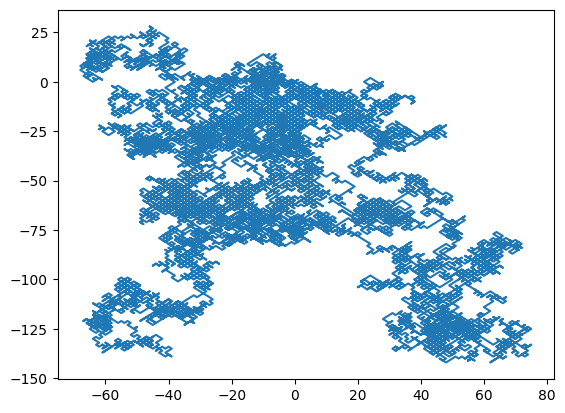

In [118]:
from matplotlib import pyplot as plt 

W = rw_d(20000, 2)

plt.plot(W[:, 0], W[:,1])

## Problem 2. Reading MIMIC-IV datafile
In this exercise, we explore various tools for ingesting the [MIMIC-IV](https://mimic.mit.edu/docs/iv/) data introduced in BIOSTAT 203B, but we will do it in Python this time.

Let's display the contents of MIMIC `hosp` and `icu` data folders: (if a cell starts with a `!`, the command is run in the shell.)

In [8]:
!ls -l ~/mimic/hosp/

total 8859760
-rw-r--r--  1 kose  staff    15516088 Jan  5  2023 admissions.csv.gz
-rw-r--r--  1 kose  staff      427468 Jan  5  2023 d_hcpcs.csv.gz
-rw-r--r--  1 kose  staff      859438 Jan  5  2023 d_icd_diagnoses.csv.gz
-rw-r--r--  1 kose  staff      578517 Jan  5  2023 d_icd_procedures.csv.gz
-rw-r--r--  1 kose  staff       12900 Jan  5  2023 d_labitems.csv.gz
-rw-r--r--  1 kose  staff    25070720 Jan  5  2023 diagnoses_icd.csv.gz
-rw-r--r--  1 kose  staff     7426955 Jan  5  2023 drgcodes.csv.gz
-rw-r--r--  1 kose  staff   508524623 Jan  5  2023 emar.csv.gz
-rw-r--r--  1 kose  staff   471096030 Jan  5  2023 emar_detail.csv.gz
-rw-r--r--  1 kose  staff     1767138 Jan  5  2023 hcpcsevents.csv.gz
-rw-r--r--  1 kose  staff        2907 May  2 11:03 index.html
-rw-r--r--@ 1 kose  staff  1939088924 May  3 14:10 labevents.csv.gz
-rw-r--r--  1 kose  staff    96698496 Jan  5  2023 microbiologyevents.csv.gz
-rw-r--r--  1 kose  staff    36124944 Jan  5  2023 omr.csv.gz
-rw-r--r--  1 kose  st

In [9]:
!ls -l ~/mimic/icu/

total 6155976
-rw-r--r--  1 kose  staff       35893 Jan  5  2023 caregiver.csv.gz
-rw-r--r--  1 kose  staff  2467761053 Jan  5  2023 chartevents.csv.gz
-rw-r--r--  1 kose  staff       57476 Jan  5  2023 d_items.csv.gz
-rw-r--r--  1 kose  staff    45721062 Jan  5  2023 datetimeevents.csv.gz
-rw-r--r--  1 kose  staff     2614571 Jan  5  2023 icustays.csv.gz
-rw-r--r--  1 kose  staff        1336 May  2 11:03 index.html
-rw-r--r--  1 kose  staff   251962313 Jan  5  2023 ingredientevents.csv.gz
-rw-r--r--  1 kose  staff   324218488 Jan  5  2023 inputevents.csv.gz
-rw-r--r--  1 kose  staff    38747895 Jan  5  2023 outputevents.csv.gz
-rw-r--r--  1 kose  staff    20717852 Jan  5  2023 procedureevents.csv.gz


### (A). Speed, memory, and data types

Standard way to read a CSV file would be using the `read_csv` function of the `pandas` package. Let us check the speed of reading a moderate-sized compressed csv file, `admissions.csv.gz`. How much memory does the resulting data frame use?

_Note:_ The runtime will be measured with `%%time` on the top of the code cell.

### (B). User-supplied data types

Re-ingest `admissions.csv.gz` by indicating appropriate column data types in [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Does the run time change? How much memory does the result dataframe use? (Hint: `dtype` and `parse_dates` arguments in `pd.read_csv`.)

## Problem 3. Ingest big data files


Let us focus on a bigger file, `labevents.csv.gz`, which is about 125x bigger than `admissions.csv.gz`.

In [17]:
!ls -l ~/mimic/hosp/labevents.csv.gz

-rw-r--r--@ 1 kose  staff  1939088924 May  3 14:10 /Users/kose/mimic/hosp/labevents.csv.gz


Display the first 10 lines of this file.

In [18]:
!zcat < ~/mimic/hosp/labevents.csv.gz | head -10

labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
1,10000032,,45421181,51237,P28Z0X,2180-03-23 11:51:00,2180-03-23 15:15:00,1.4,1.4,,0.9,1.1,abnormal,ROUTINE,
2,10000032,,45421181,51274,P28Z0X,2180-03-23 11:51:00,2180-03-23 15:15:00,___,15.1,sec,9.4,12.5,abnormal,ROUTINE,VERIFIED.
3,10000032,,52958335,50853,P28Z0X,2180-03-23 11:51:00,2180-03-25 11:06:00,___,15,ng/mL,30,60,abnormal,ROUTINE,NEW ASSAY IN USE ___: DETECTS D2 AND D3 25-OH ACCURATELY.
4,10000032,,52958335,50861,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,102,102,IU/L,0,40,abnormal,ROUTINE,
5,10000032,,52958335,50862,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,3.3,3.3,g/dL,3.5,5.2,abnormal,ROUTINE,
6,10000032,,52958335,50863,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,109,109,IU/L,35,105,abnormal,ROUTINE,
7,10000032,,52958335,50864,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,___,8,ng/mL,0,8.7,,ROUTI

### (A). Ingest `labevents.csv.gz` by `pd.read_csv`

Try to ingest `labevents.csv.gz` using `pd.read_csv`. What happens? If it takes more than 5 minutes on your computer, then abort the program and report your findings. 

### (B). Ingest selected columns of `labevents.csv.gz` by `pd.read_csv`

Try to ingest only columns `subject_id`, `itemid`, `charttime`, and `valuenum` in `labevents.csv.gz` using `pd.read_csv`.  Does this solve the ingestion issue? (Hint: `usecols` argument in `pd.read_csv`.)

### (C). Ingest subset of `labevents.csv.gz`

Back in BIOSTAT 203B, our first strategy to handle this big data file was to make a subset of the `labevents` data.  Read the [MIMIC documentation](https://mimic.mit.edu/docs/iv/modules/hosp/labevents/) for the content in data file `labevents.csv.gz`.

As before, we will only be interested in the following lab items: creatinine (50912), potassium (50971), sodium (50983), chloride (50902), bicarbonate (50882), hematocrit (51221), white blood cell count (51301), and glucose (50931) and the following columns: `subject_id`, `itemid`, `charttime`, `valuenum`. 

Run the Bash command to extract these columns and rows from `labevents.csv.gz` and save the result to a new file `labevents_filtered.csv.gz` in the current working directory (Q2.3 of HW2). How long does it take?
(_You may reuse the file you created last quarter and report the elapsed time from the last quarter for this part._)

Display the first 10 lines of the new file `labevents_filtered.csv.gz`. How many lines are in this new file? How long does it take `pd.read_csv()` to ingest `labevents_filtered.csv.gz`?


### (D). Review

Write several sentences on what the Parquet format, DuckDB, and polars are. Imagine you want to explain it to a layman in an elevator, as you did before. (It's OK to copy-paste the sentences from your previous submission.)

Also, now is the good time to review [basic SQL commands](https://ucla-biostat-203b.github.io/2024winter/slides/12-dbplyr/dbintro.html) covered in BIOSTAT 203B.

### (E) Transform `labevents.csv.gz` to `.parquet` format and ingestion with DuckDB

Often, `.csv.gz` format results in major bottleneck in high-performance data processing due to its compression. It's simple to change the data format using DuckDB: run the following cell to transform the `labevents.csv.gz` to `.parquet` format.


In [ ]:
import duckdb

In [ ]:
%%time
duckdb.sql("""
    COPY (
        SELECT * FROM read_csv('~/mimic/hosp/labevents.csv.gz')
    ) TO 'labevents.parquet' (FORMAT 'parquet')
""")

Then, let's use the `duckdb` package in Python to use the DuckDB interface. In Python, DuckDB can interact smoothly with `pandas` and `polars`. I recommend reading: 

- https://duckdb.org/2021/05/14/sql-on-pandas.html
- https://duckdb.org/docs/stable/guides/python/polars.html

In Python, you will mostly use SQL commands to work with DuckDB. Check out the [data ingestion API](https://duckdb.org/docs/api/python/data_ingestion).


Ingest the Parquet file, select columns, and filter rows as in (G). How long does the ingest+select+filter process take? Please make sure to call `.pl()` method to have the final result as a `polars` `DataFrame`. Display the number of rows and the first 10 rows of the result dataframe and make sure they match those in (C). 

__This should be significantly faster than the results before (but not including) Part (D).__ 
_Hint_: It could be a single SQL command.

    
- Finally, let's obtain the result in `polars` `DataFrame` using the method `.pl()`. 

How long does the ingest+select+filter process take? Display the number of rows and the first 10 rows of the result dataframe, and make sure they match those of (C).


### (F). Polars

Let's ingest the data with polars this time. Let's first try `pl.read_parquet()` function to load the data. Does it work on your computer? If so, how long does it take? Why is this happening? (If it runs over several minutes, you may just stop running the kernel, like above.)

Actually, this is a great alternative -- lazy evaluation. Replace `pl.read_parquet()` with  `pl.scan_parquet()`, and observe the difference. What would be the biggest difference between `pl.read_parquet()` and  `pl.scan_parquet()` under this scenario?

### (G). Comparison
Compare your results between Part (E) and (F); and along with the results from Homework 2 of BIOSTAT 203B. 

## Problem 4. Ingest and filter `chartevents.csv.gz`

[`chartevents.csv.gz`](https://mimic.mit.edu/docs/iv/modules/icu/chartevents/) contains all the charted data available for a patient. During their ICU stay, the primary repository of a patient’s information is their electronic chart. The `itemid` variable indicates a single measurement type in the database. The `value` variable is the value measured for `itemid`. The first 10 lines of `chartevents.csv.gz` are


In [ ]:
!zcat < ~/mimic/icu/chartevents.csv.gz | head -10

[`d_items.csv.gz`](https://mimic.mit.edu/docs/iv/modules/icu/d_items/) is the dictionary for the `itemid` in `chartevents.csv.gz`.

In [ ]:
!zcat < ~/mimic/icu/d_items.csv.gz | head -10

Again, we are interested in the vitals for ICU patients: heart rate (220045), mean non-invasive blood pressure (220181), systolic non-invasive blood pressure (220179), body temperature in Fahrenheit (223761), and respiratory rate (220210). Retrieve a subset of `chartevents.csv.gz` only containing these items, using the favorite method you learned in Problem 3. 

Document the steps and show your code. Display the number of rows and the first 10 rows of the result `DataFrame`.